In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings

In [2]:
df = pd.read_csv('C:/Users/rishp/OneDrive/Documents/GitHub/DataWranglingCapstone/cleaneddf.csv')

In [3]:
df.head()

,state,date,cases,deaths,Hospital inpatient beds available,"ICU bed occupancy, estimate"
0,Alabama,2020-04-15,4241,123,7149,1474
1,Alabama,2020-04-16,4404,137,6635,1458
2,Alabama,2020-04-17,4572,151,6728,1460
3,Alabama,2020-04-18,4723,147,7077,1506
4,Alabama,2020-04-19,4903,160,6685,1347


In [4]:
df.dtypes

state                                object
date                                 object
cases                                 int64
deaths                                int64
Hospital inpatient beds available     int64
ICU bed occupancy, estimate           int64
dtype: object

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.dtypes

state                                        object
date                                 datetime64[ns]
cases                                         int64
deaths                                        int64
Hospital inpatient beds available             int64
ICU bed occupancy, estimate                   int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   state                              4836 non-null   object        
 1   date                               4836 non-null   datetime64[ns]
 2   cases                              4836 non-null   int64         
 3   deaths                             4836 non-null   int64         
 4   Hospital inpatient beds available  4836 non-null   int64         
 5   ICU bed occupancy, estimate        4836 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 226.8+ KB


In [8]:
state_summary = df.set_index('state')

In [9]:
state_summary.deaths.sort_values(ascending=False).head()

state
New Jersey    15281
New Jersey    15229
New Jersey    15211
New Jersey    15189
New Jersey    15164
Name: deaths, dtype: int64

In [10]:
state_summary.cases.sort_values(ascending=False).head()

state
California    287766
California    277869
California    271587
California    265176
California    256298
Name: cases, dtype: int64

In [11]:
state_summary['Hospital inpatient beds available'].sort_values(ascending=False).head()

state
California    39293
California    39127
California    37092
Texas         36980
California    36827
Name: Hospital inpatient beds available, dtype: int64

In [12]:
state_summary['ICU bed occupancy, estimate'].sort_values(ascending=False).head()

state
California    8617
Texas         8550
California    8269
California    8261
California    8251
Name: ICU bed occupancy, estimate, dtype: int64

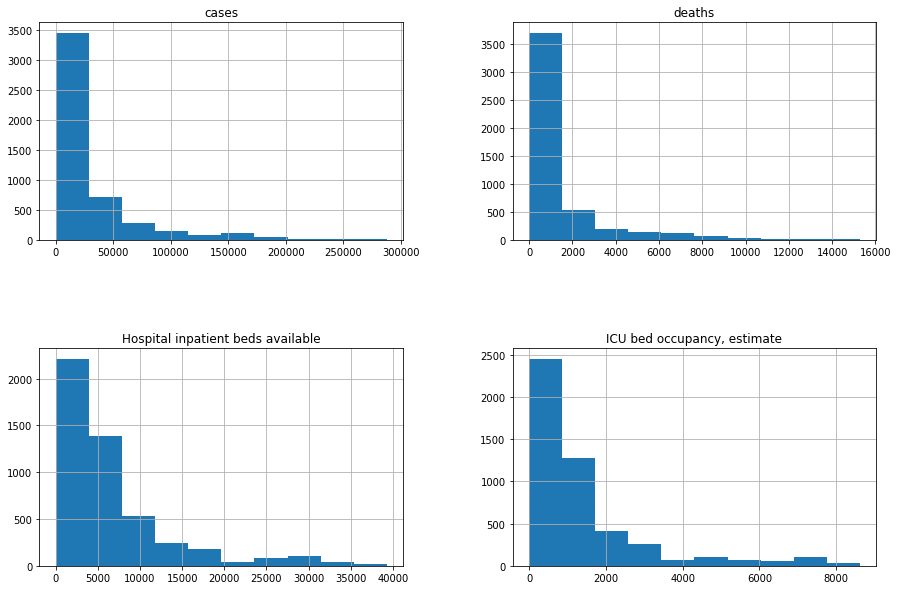

In [13]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [14]:
df.corr()

,cases,deaths,Hospital inpatient beds available,"ICU bed occupancy, estimate"
cases,1.000000,0.892956,0.505795,0.660641
deaths,0.892956,1.000000,0.352232,0.447974
Hospital inpatient beds available,0.505795,0.352232,1.000000,0.909969
"ICU bed occupancy, estimate",0.660641,0.447974,0.909969,1.000000


<AxesSubplot:>

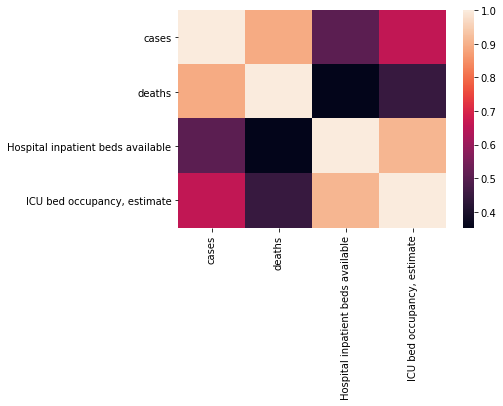

In [15]:
sns.heatmap(df.corr())

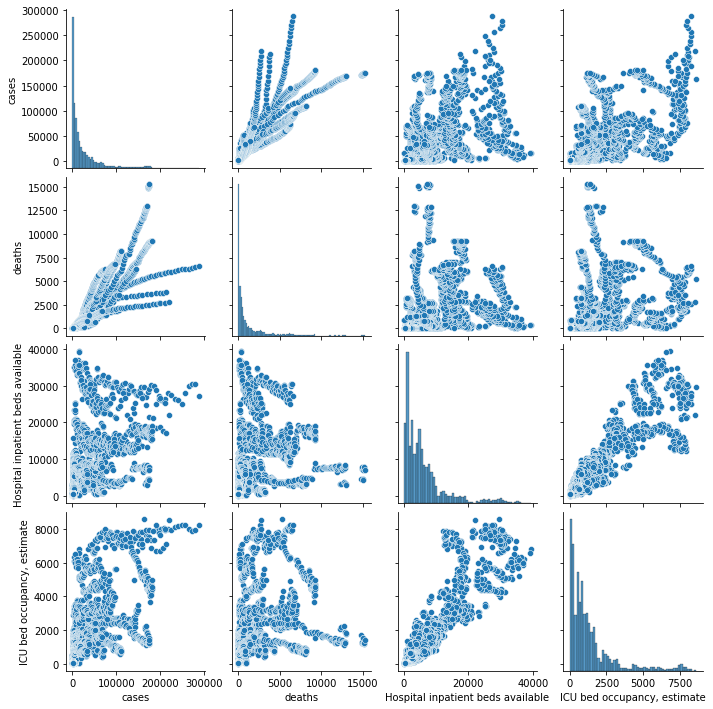

In [16]:
sns.pairplot(df)

In [17]:
df.head()

,state,date,cases,deaths,Hospital inpatient beds available,"ICU bed occupancy, estimate"
0,Alabama,2020-04-15,4241,123,7149,1474
1,Alabama,2020-04-16,4404,137,6635,1458
2,Alabama,2020-04-17,4572,151,6728,1460
3,Alabama,2020-04-18,4723,147,7077,1506
4,Alabama,2020-04-19,4903,160,6685,1347


In [18]:
df['datemonth'] = df['date'].dt.month
df['dateweek'] = df['date'].dt.isocalendar().week
df['dateday'] = df['date'].dt.day

In [19]:
df = df.drop(columns = 'date')

In [20]:
df = pd.get_dummies(df, drop_first= True)

In [39]:
df.head()

,cases,deaths,Hospital inpatient beds available,"ICU bed occupancy, estimate",datemonth,dateweek,dateday,state_Alaska,state_Arizona,state_Arkansas,...,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,4241,123,7149,1474,4,16,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4404,137,6635,1458,4,16,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4572,151,6728,1460,4,16,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4723,147,7077,1506,4,16,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4903,160,6685,1347,4,16,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaleddata = ss.fit_transform(df)

In [23]:
scaleddf = pd.DataFrame(scaleddata)

In [29]:
scaleddf.columns = df.columns

In [36]:
y = scaleddf.iloc[:,2]

In [37]:
X = scaleddf.loc[:, scaleddf.columns != 'Hospital inpatient beds available']

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 123)

Text(0, 0.5, 'Proportion of Variance Explained')

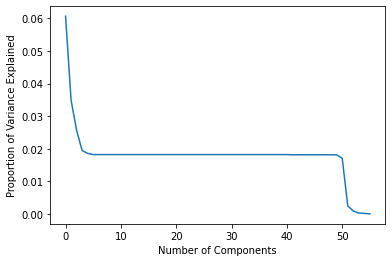

In [41]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(X)
variance = pca.explained_variance_ratio_
plt.plot(range(len(variance)), variance)
plt.xlabel("Number of Components")
plt.ylabel("Proportion of Variance Explained")
